### Import related libraries

In [1]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
from dnndk import n2cube, dputils
from ctypes import *
import cv2
import numpy as np
import os
import threading
import time
import sys
from matplotlib import pyplot as plt
import matplotlib

### Load image

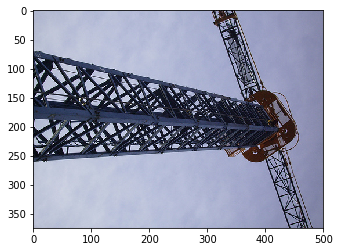

In [2]:
img_path = '/home/xilinx/val5000/ILSVRC2012_val_00000020.JPEG'
img = plt.imread(img_path)
plt.imshow(img)
img = cv2.imread(img_path)

### Load wordlist

In [3]:
wordlist = open('./words.txt','rb+').readlines()

### Configure DPU parameters

In [4]:
KERNEL_CONV = "resnet50_0"
KERNEL_CONV_INPUT = "conv1"
KERNEL_FC_OUTPUT = "fc1000"

### Setup DPU

In [5]:
# Attach to DPU driver and prepare for runing
n2cube.dpuOpen()
# Create DPU Kernels for ResNet50
kernel = n2cube.dpuLoadKernel(KERNEL_CONV)
# Create DPU Tasks from DPU Kernel
task = n2cube.dpuCreateTask(kernel, 0)
# Get the output tensor channel from FC output
channel = n2cube.dpuGetOutputTensorChannel(task, KERNEL_FC_OUTPUT)

FCResult = [0 for i in range(channel)]
mean = [104,107,123]

### Run DPU and get the result

In [ ]:
# Load image to DPU
dputils.dpuSetInputImage(task, KERNEL_CONV_INPUT, img, mean)
# Model run on DPU
n2cube.dpuRunTask(task)
# Get the output from FC output
n2cube.dpuGetOutputTensorInHWCFP32(task, KERNEL_FC_OUTPUT, FCResult, channel)
# Get the label
label = FCResult.index(max(FCResult))

### Print result

In [8]:
print(label, wordlist[label])

(517, 'crane\n')


### Destroy DPU tasks & free resources

In [9]:
rtn = n2cube.dpuDestroyKernel(kernel)
n2cube.dpuClose()

0